# Assignment 1: Logistic Regression

## 1 Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import copy
import math

%matplotlib inline

## 2 Logistic Regression

### 2.1 Problem Statement

### 2.2 Loading and visualizing the data

In [2]:
X_train,y_train=load_data("data/ex2data1.txt")

In [3]:
print("First five elements in X_train are:\n", X_train[:5])
print("Type of X_train:",type(X_train))

First five elements in X_train are:
 [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
Type of X_train: <class 'numpy.ndarray'>


In [6]:
X_train.shape

(100, 2)

In [7]:
print("First five elements in y_train are:\n", y_train[:5])
print("Type of y_train:",type(y_train))
y_train.shape

First five elements in y_train are:
 [0. 0. 0. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


(100,)

In [8]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (100, 2)
The shape of y_train is: (100,)
We have m = 100 training examples


Text(0, 0.5, 'Exam 2 score')

Text(0.5, 0, 'Exam 1 Score')

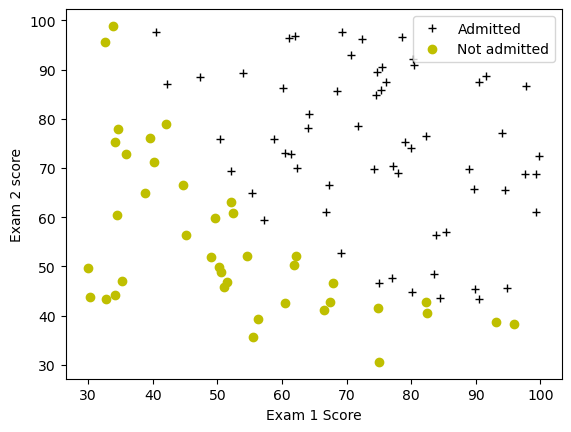

In [9]:
plot_data(X_train,y_train,pos_label="Admitted",neg_label="Not admitted")
plt.ylabel("Exam 2 score")
plt.xlabel("Exam 1 Score")
plt.legend(loc="upper right")
plt.show()

### 2.3 Sigmoid Function

## <span style="color: red;">Exercise 1</span>

In [12]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """

    g=(1/(1+np.exp(-z)))

    return g

In [13]:
print ("sigmoid(-100) = " + str(sigmoid(-100)))
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(100) = " + str(sigmoid(100)))

sigmoid(-100) = 3.7200759760208356e-44
sigmoid(0) = 0.5
sigmoid(100) = 1.0


In [14]:
print ("sigmoid([ -1, 0, 1, 2]) = " + str(sigmoid(np.array([-1, 0, 1, 2]))))

sigmoid([ -1, 0, 1, 2]) = [0.26894142 0.5        0.73105858 0.88079708]


In [15]:
from public_tests import *
sigmoid_test(sigmoid)

All tests passed!


### 2.4 Cost function for logistic regression

## <span style="color: red">Exercise 2</span>

In [34]:
def compute_cost(X,y,w,b,lambda_=1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m,n=X.shape
    cost=0
    for i in range(m):
        z_i=np.dot(w,X[i,:])+b
        f_w_b_i=sigmoid(z_i)
        cost_i=(-y[i]*np.log(f_w_b_i))-((1-y[i])*np.log(1-f_w_b_i))
        cost=cost+cost_i
    cost=cost/m
    return cost


In [35]:
initial_w=np.zeros(X_train.shape[1])
initial_b=0
cost=compute_cost(X_train,y_train,initial_w,initial_b)
print("Cost at initial w (zero):", cost)

Cost at initial w (zero): 0.6931471805599458


In [36]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)
print("Cost at test w,b:",cost)

Cost at test w,b: 0.21833019382659777


In [37]:
compute_cost_test(compute_cost)

All tests passed!


### 2.5 Gradient for Logistic regression

### <span style="color:red">Exercise 3 </span>

In [42]:
def compute_gradient(X,y,w,b,lambda_=None):
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    for i in range(m):
        f_w_b_i=sigmoid(np.dot(X[i],w)+b)
        err_i=f_w_b_i-y[i]
        for j in range(n):
            dj_dw[j]=dj_dw[j]+err_i*X[i,j]
        dj_db=dj_db+err_i
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_db, dj_dw

In [43]:
# Compute and display gradient with w initialized to zeroes
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.

dj_db, dj_dw = compute_gradient(X_train, y_train, initial_w, initial_b)
print(f'dj_db at initial w (zeros):{dj_db}' )
print(f'dj_dw at initial w (zeros):{dj_dw.tolist()}' )

dj_db at initial w (zeros):-0.1
dj_dw at initial w (zeros):[-12.00921658929115, -11.262842205513591]


In [44]:
# Compute and display cost and gradient with non-zero w
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# UNIT TESTS    
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.5999999999991071
dj_dw at test_w: [-44.831353617873795, -44.37384124953978]
All tests passed!


### 2.6 Learning parameters using gradient descent

In [48]:
def gradient_descent(X,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters,lambda_):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    m=len(X)
    J_history=[]
    w_history=[]

    for i in range(num_iters):
        dj_db,dj_dw=gradient_function(X,y,w_in,b_in,lambda_)
        w_in=w_in-alpha*dj_dw
        b_in=b_in-alpha*dj_db
        if i<100000:
            cost=cost_function(X,y,w_in,b_in,lambda_)
            J_history.append(cost)
        
        if i%math.ceil(num_iters/10)==0 or i==(num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i}: Cost{float(J_history[-1]):8.2f}")
    return w_in,b_in,J_history,w_history

In [49]:
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(2).reshape(-1,1) - 0.5)
initial_b = -8


# Some gradient descent settings
iterations = 10000
alpha = 0.001

w,b, J_history,_ = gradient_descent(X_train ,y_train, initial_w, initial_b, 
                                   compute_cost, compute_gradient, alpha, iterations, 0)

Iteration 0: Cost    1.01
Iteration 1000: Cost    0.31
Iteration 2000: Cost    0.30
Iteration 3000: Cost    0.30
Iteration 4000: Cost    0.30
Iteration 5000: Cost    0.30
Iteration 6000: Cost    0.30
Iteration 7000: Cost    0.30
Iteration 8000: Cost    0.30
Iteration 9000: Cost    0.30
Iteration 9999: Cost    0.30


### 2.7 Plotting the decision boundary

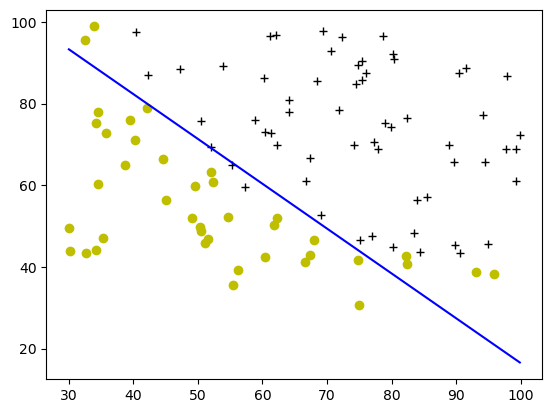

In [50]:
plot_decision_boundary(w,b,X_train,y_train)

### 2.8 Evaluating logistic regression

### <span style="color:red">Exercise 4</span>

In [67]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)

    for i in range(m):
        z_wb=0
        for j in range(n):
            z_wb_ij=np.dot(X[i,j],w[j])
            z_wb+=z_wb_ij
        z_wb+=+b
        f_wb=sigmoid(z_wb)
        p[i]=1 if f_wb>0.5 else 0
    return p

In [68]:
# Test your predict code
np.random.seed(1)
tmp_w = np.random.randn(2)
tmp_b = 0.3    
tmp_X = np.random.randn(4, 2) - 0.5

tmp_p = predict(tmp_X, tmp_w, tmp_b)
print(f'Output of predict: shape {tmp_p.shape}, value {tmp_p}')

# UNIT TESTS        
predict_test(predict)

Output of predict: shape (4,), value [0. 1. 1. 1.]
All tests passed!


In [69]:
p = predict(X_train, w,b)
print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 92.000000


## 3 Regularized Logistic Regression

### 3.1 Problem Statement

### 3.2 Loading and visualizing the data

In [70]:
X_train, y_train = load_data("data/ex2data2.txt")

In [71]:
# print X_train
print("X_train:", X_train[:5])
print("Type of X_train:",type(X_train))

# print y_train
print("y_train:", y_train[:5])
print("Type of y_train:",type(y_train))

X_train: [[ 0.051267  0.69956 ]
 [-0.092742  0.68494 ]
 [-0.21371   0.69225 ]
 [-0.375     0.50219 ]
 [-0.51325   0.46564 ]]
Type of X_train: <class 'numpy.ndarray'>
y_train: [1. 1. 1. 1. 1.]
Type of y_train: <class 'numpy.ndarray'>


In [72]:
print ('The shape of X_train is: ' + str(X_train.shape))
print ('The shape of y_train is: ' + str(y_train.shape))
print ('We have m = %d training examples' % (len(y_train)))

The shape of X_train is: (118, 2)
The shape of y_train is: (118,)
We have m = 118 training examples


Text(0, 0.5, 'Microchip Test 2')

Text(0.5, 0, 'Microchip Test 1')

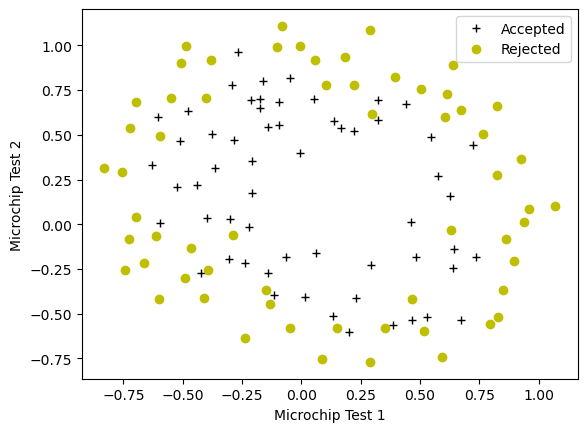

In [73]:
# Plot examples
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")

# Set the y-axis label
plt.ylabel('Microchip Test 2') 
# Set the x-axis label
plt.xlabel('Microchip Test 1') 
plt.legend(loc="upper right")
plt.show()

### 3.3 Feature mapping

In [74]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [75]:
print("X_train[0]:", X_train[0])
print("mapped X_train[0]:", mapped_X[0])

X_train[0]: [0.051267 0.69956 ]
mapped X_train[0]: [5.12670000e-02 6.99560000e-01 2.62830529e-03 3.58643425e-02
 4.89384194e-01 1.34745327e-04 1.83865725e-03 2.50892595e-02
 3.42353606e-01 6.90798869e-06 9.42624411e-05 1.28625106e-03
 1.75514423e-02 2.39496889e-01 3.54151856e-07 4.83255257e-06
 6.59422333e-05 8.99809795e-04 1.22782870e-02 1.67542444e-01
 1.81563032e-08 2.47750473e-07 3.38066048e-06 4.61305487e-05
 6.29470940e-04 8.58939846e-03 1.17205992e-01]


### 3.4 Cost function for regularized logistic regression

### <span style="color:red">Exercise 5</span>

In [76]:
def compute_cost_reg(X,y,w,b,lambda_=1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b)

    reg_cost=0

    for j in range(n):
        reg_cost=reg_cost+w[j]**2
    total_cost=cost_without_reg+(lambda_/(2*m))*reg_cost

    return total_cost

In [77]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularized cost :", cost)

# UNIT TEST    
compute_cost_reg_test(compute_cost_reg)

Regularized cost : 0.6618252552483948
All tests passed!


### 3.5 Gradient for regularized logistic regression

### <span style="color:red">Exercise 6</span>

In [78]:
def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    for j in range(n):
        dj_dw[j]=dj_dw[j]+(lambda_/m)*w[j]
    
    return dj_db,dj_dw

In [79]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1) 
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5 
initial_b = 0.5
 
lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}", )
print(f"First few elements of regularized dj_dw:\n {dj_dw[:4].tolist()}", )

# UNIT TESTS    
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343662
First few elements of regularized dj_dw:
 [-0.010386028450548701, 0.011409852883280122, 0.0536273463274574, 0.003140278267313462]
All tests passed!


### 3.6 Learning parameters using gradient descent

In [100]:
# Initialize fitting parameters
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.5
initial_b = 1.

# Set regularization parameter lambda_ to 1 (you can try varying this)
lambda_ = 0.01;                                          
# Some gradient descent settings
iterations = 10000
alpha = 0.01

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b, 
                                    compute_cost_reg, compute_gradient_reg, 
                                    alpha, iterations, lambda_)

Iteration 0: Cost    0.72
Iteration 1000: Cost    0.59
Iteration 2000: Cost    0.56
Iteration 3000: Cost    0.53
Iteration 4000: Cost    0.51
Iteration 5000: Cost    0.50
Iteration 6000: Cost    0.48
Iteration 7000: Cost    0.47
Iteration 8000: Cost    0.46
Iteration 9000: Cost    0.45
Iteration 9999: Cost    0.45


### 3.7 Plotting the decision boundary

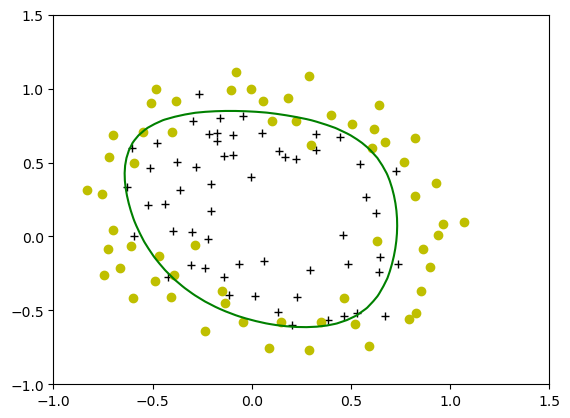

In [101]:
plot_decision_boundary(w, b, X_mapped, y_train)

### 3.8 Evaluating regularized logistc regression model

In [102]:
#Compute accuracy on the training set
p = predict(X_mapped, w, b)

print('Train Accuracy: %f'%(np.mean(p == y_train) * 100))

Train Accuracy: 82.203390
